# **Studi kasus two way**

Pengaruh Jenis Pelatihan dan Tingkat Pendidikan terhadap Skor Kompetensi Karyawan

Deskripsi:
Sebuah perusahaan ingin mengevaluasi dua hal:
- Apakah jenis pelatihan (A atau B) berpengaruh terhadap hasil tes karyawan?
- Apakah tingkat pendidikan (SMA, S1, S2) juga berpengaruh?
- Apakah ada interaksi antara jenis pelatihan dan tingkat pendidikan?


**Import Data**

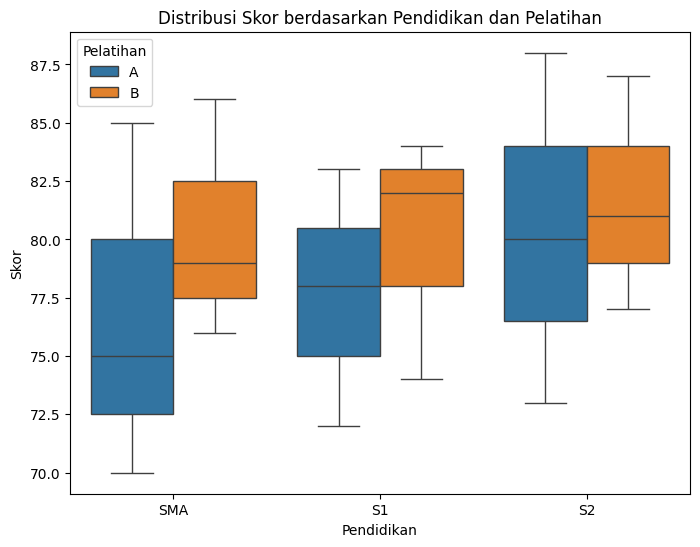

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Data simulasi
data = pd.DataFrame({
    "Skor": [75, 78, 80, 85, 83, 88, 70, 72, 73, 76, 74, 77, 79, 82, 81, 86, 84, 87],
    "Pelatihan": ["A"] * 9 + ["B"] * 9,
    "Pendidikan": (["SMA", "S1", "S2"] * 3) * 2
})

# Visualisasi awal
plt.figure(figsize=(8,6))
sns.boxplot(x="Pendidikan", y="Skor", hue="Pelatihan", data=data)
plt.title("Distribusi Skor berdasarkan Pendidikan dan Pelatihan")
plt.show()


**Uji Asumsi ANOVA**

1. Normalitas (Shapiro-Wilk Test) \
Interpretasi: Jika semua p-value > 0.05 → data normal

In [8]:
from scipy.stats import shapiro
results = []

for edu in data["Pendidikan"].unique():
    for pel in data["Pelatihan"].unique():
        subset = data[(data["Pendidikan"] == edu) & (data["Pelatihan"] == pel)]["Skor"]
        stat, p = shapiro(subset)
        results.append({"Pelatihan": pel, "Pendidikan": edu, "p-value": round(p, 4)})

pd.DataFrame(results)


,Pelatihan,Pendidikan,p-value
0,A,SMA,0.6369
1,B,SMA,0.5665
2,A,S1,0.8999
3,B,S1,0.3631
4,A,S2,0.9265
5,B,S2,0.7804


2. Homogenitas Variansi (Levene Test) \
Interpretasi: Jika p > 0.05 → variansi antar grup dianggap homogen

In [9]:
from scipy.stats import levene

grouped = data.groupby(['Pendidikan', 'Pelatihan'])['Skor'].apply(list).tolist()
stat, p = levene(*grouped)
print(f"Levene Test (Homogenitas): p-value = {p:.4f}")


Levene Test (Homogenitas): p-value = 0.9819


Uji ANOVA (Two-Way ANOVA)

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Model ANOVA 2 arah dengan interaksi
model = ols("Skor ~ C(Pelatihan) * C(Pendidikan)", data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                                sum_sq    df         F    PR(>F)
C(Pelatihan)                 26.888889   1.0  0.718101  0.413350
C(Pendidikan)                22.111111   2.0  0.295252  0.749598
C(Pelatihan):C(Pendidikan)    4.111111   2.0  0.054896  0.946820
Residual                    449.333333  12.0       NaN       NaN


Jenis Pelatihan:
- p-value = 0.413 > 0.05 → Tidak ada pengaruh signifikan jenis pelatihan terhadap skor.

Tingkat Pendidikan:
- p-value = 0.750 > 0.05 → Tidak ada pengaruh signifikan tingkat pendidikan terhadap skor.

Interaksi Pelatihan x Pendidikan:
- p-value = 0.947 > 0.05 → Tidak ada interaksi signifikan antara pelatihan dan pendidikan.


Karena tidak ada faktor yang signifikan (semua p-value > 0.05), uji Tukey HSD tidak diperlukan.